In [1]:
import requests
import spotipy
from requests.auth import HTTPBasicAuth
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
from client import client_id, client_secret

In [3]:
top_US_artist_df = pd.read_csv("Top Country CSV/top50us.csv")
top_US_artist_df.head()

,artists,artist id,tracks,track ids,released,popularity,genre,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
0,Ariana Grande,66CXWjxzNUsdJxJ2JdwvnR,7 rings,6ocbgoVGwYJhOv1GgI9NsF,2019-02-08,91,"['dance pop', 'pop', 'post-teen pop']",0.771,0.320,1.0,...,0.0,0.3160,0.6010,0.000000,0.0885,0.312,139.844,audio_features,178627.0,4.0
1,Ariana Grande,66CXWjxzNUsdJxJ2JdwvnR,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,2019-02-08,97,"['dance pop', 'pop', 'post-teen pop']",0.726,0.545,5.0,...,0.0,0.1020,0.0378,0.000000,0.1080,0.348,169.991,audio_features,190440.0,4.0
2,J. Cole,6l3HvQ5sa6mXTsMTB19rO5,MIDDLE CHILD,2JvzF1RMd7lE3KmFlsyZD8,2019-01-23,94,"['conscious hip hop', 'nc hip hop', 'pop', 'po...",0.837,0.364,8.0,...,1.0,0.2760,0.1490,0.000000,0.2710,0.463,123.984,audio_features,213594.0,4.0
3,Post Malone,246dkjvS1zLTtiykXe5h60,Wow.,6MWtB6iiXyIwun0YzU6DFP,2018-12-24,98,"['pop', 'rap']",0.833,0.539,11.0,...,0.0,0.1780,0.1630,0.000002,0.1010,0.385,99.947,audio_features,149520.0,4.0
4,Various Artists,0LyfQWJT6nXafLPZqxe9Of,Sunflower - Spider-Man: Into the Spider-Verse,7dbka99KTWke5o9hRp0JoB,2019-02-22,1,[],0.761,0.479,2.0,...,1.0,0.0466,0.5520,0.000000,0.0704,0.912,89.913,audio_features,158040.0,4.0


In [4]:
token_url = "https://accounts.spotify.com/api/token"
headers = {'content-type': 'application/x-www-form-urlencoded'}

token_params = {"grant_type" : "client_credentials"}

token_json = requests.post(token_url, params = token_params, headers = headers, auth = (client_id, client_secret)).json()
token = token_json['access_token']

token_json

{'access_token': 'BQDn0RD8WttOaQmhtkf-AM5JWVBGSWNn8wtOGmQn9mfNoxVHuorKtZ340kWPO6Cy8DwgOaFnfZ49iq0KI3w',
 'token_type': 'Bearer',
 'expires_in': 3600,
 'scope': ''}

In [5]:
token_headers = {'authorization': f"Bearer {token}"}

artist_name_list = []
artist_id_list = []
artist_followers_list = []
genre_list = []
genre_popularity = []

search_url = "https://api.spotify.com/v1/artists/"

print("----------------------\nRetrieving Artist ID\n----------------------")

for artist_id in top_US_artist_df["artist id"]:
    track_url = search_url + artist_id
    
    try:
        artist_json = requests.get(track_url, headers = token_headers).json()
        artist_id = artist_json["id"]
        artist_name = artist_json["name"]
        artist_follower = artist_json["followers"]["total"]
        genres = artist_json["genres"]
        
        if artist_id not in artist_id_list:
            artist_id_list.append(artist_id)
            artist_name_list.append(artist_name)
            artist_followers_list.append(artist_follower)
            
            for genre in genres:
                if genre not in genre_list:
                    genre_list.append(genre)
                    genre_popularity.append(1)
                    
                else:
                    genre_popularity[genre_list.index(genre)] += 1
                
            print(f"Artist ID Found | {artist_id} | {artist_name}")
            
        else:   
            print("Artist ID in list already")
        
    except IndexError:
        print("Could Not Find Artist ID")

----------------------
Retrieving Artist ID
----------------------
Artist ID Found | 66CXWjxzNUsdJxJ2JdwvnR | Ariana Grande
Artist ID in list already
Artist ID Found | 6l3HvQ5sa6mXTsMTB19rO5 | J. Cole
Artist ID Found | 246dkjvS1zLTtiykXe5h60 | Post Malone
Artist ID Found | 0LyfQWJT6nXafLPZqxe9Of | Various Artists
Artist ID Found | 4MCBfE4596Uoi2O4DtmEMz | Juice WRLD
Artist ID Found | 1cNDP5yjU5vjeR8qMf4grg | YNW Melly
Artist ID Found | 20sxb77xiYeusSH8cVdatc | Meek Mill
Artist ID Found | 1URnnhqYAYcrqrcwql10ft | 21 Savage
Artist ID Found | 3Fl1V19tmjt57oBdxXKAjJ | Blueface
Artist ID in list already
Artist ID Found | 4DdkRBBYG6Yk9Ka8tdJ9BW | Offset
Artist ID Found | 5f7VJjfbwm532GiveGC0ZK | Lil Baby
Artist ID in list already
Artist ID Found | 6qqNVTkY8uBg9cP3Jd7DAH | Billie Eilish
Artist ID in list already
Artist ID Found | 6LuN9FCkKOj5PcnpouEgny | Khalid
Artist ID Found | 0Y5tJX1MQlPlqiwlOH1tJY | Travis Scott
Artist ID Found | 26VFTg2z8YR0cCuwLzESi2 | Halsey
Artist ID Found | 0YinUQ50Q

In [6]:
genre_US_df = pd.DataFrame({
    "Genre" : genre_list,
    "Genre Count" : genre_popularity
})

genre_US_df["Genre by Artist Percentage"] = (genre_US_df["Genre Count"]/len(artist_name_list)) * 100

genre_US_df = genre_US_df.sort_values(by = "Genre by Artist Percentage", ascending = False).head(15).reset_index()

genre_US_df

,index,Genre,Genre Count,Genre by Artist Percentage
0,6,rap,18,58.064516
1,1,pop,17,54.838710
2,8,trap music,14,45.161290
3,5,pop rap,10,32.258065
4,0,dance pop,6,19.354839
5,9,hip hop,5,16.129032
6,11,atl hip hop,5,16.129032
7,2,post-teen pop,4,12.903226
8,14,electropop,3,9.677419
9,23,vapor trap,2,6.451613


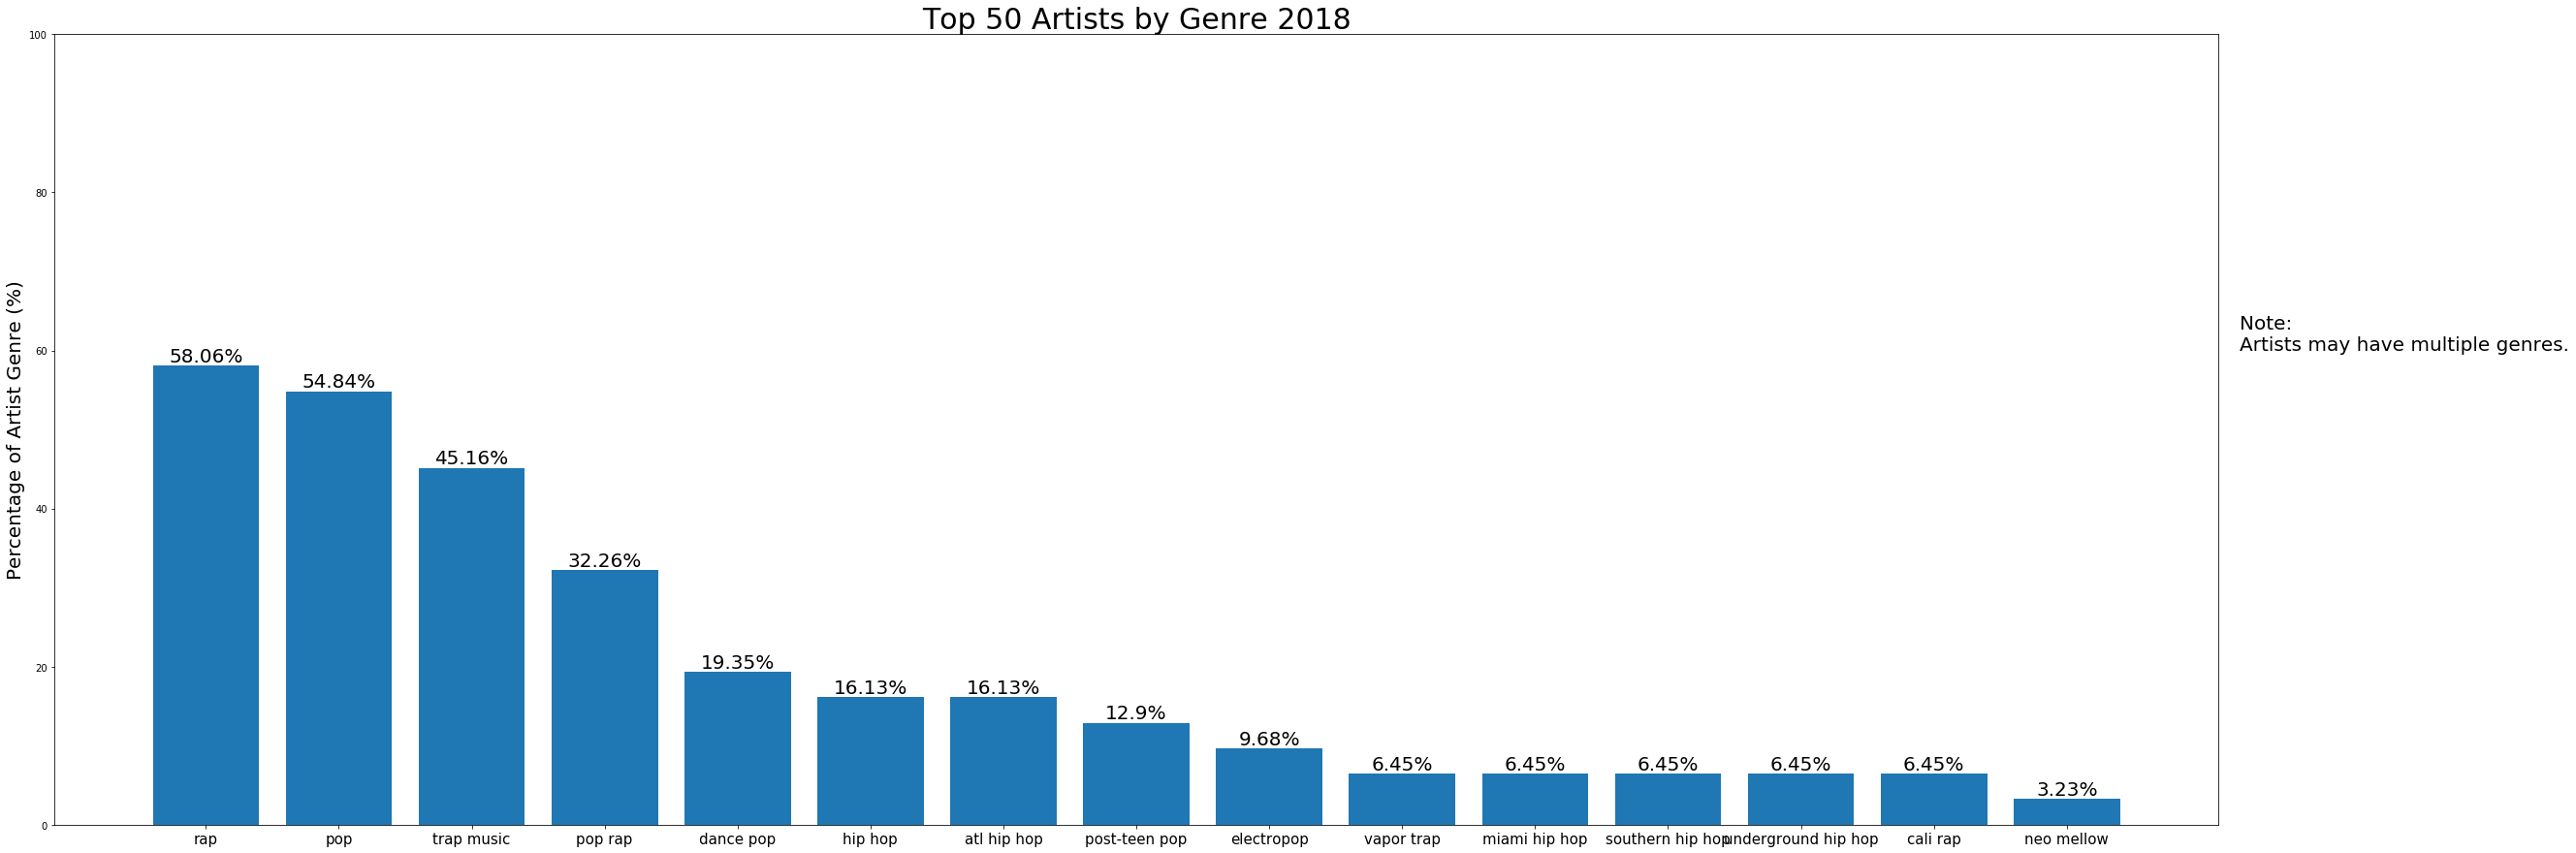

In [9]:
fig, ax = plt.subplots(figsize = (40,15))
x_axis = np.arange(15)

ax.bar(x_axis, genre_US_df["Genre by Artist Percentage"])
plt.xticks(x_axis, genre_US_df["Genre"], Fontsize = 15)
plt.ylim(0, 100)
plt.ylabel("Percentage of Artist Genre (%)", Fontsize = 20)
plt.title("Top 50 Artists by Genre 2018", Fontsize = 30)
plt.text(max(x_axis) + 1.3, 60, "Note:\nArtists may have multiple genres.", Fontsize = 20)

rects = ax.patches

for rect in rects:
    height = rect.get_height()
    width = rect.get_x() + 0.4
    if height > 0:
        ax.text(width, height, f'{round(height,2)}%', Fontsize = 20, ha = 'center', va = 'bottom')
    else:
         ax.text(width, height, f'{round(height,2)}%', Fontsize = 20, ha = 'center', va = 'top')

plt.show()